In [1]:
from toolbox.data import read_data, read_geojson, read_coastline, process_roommates
from toolbox.fit import CONFIG
from toolbox.model_pipeline import preprocess_data
import matplotlib.pyplot as plt

In [2]:
data = read_data()

In [3]:
import pandas as pd
import numpy as np
# how to filter data based on column data? create subset
attri = ["areaSqm", "city", "rent", "roommates", "gender", "internet", "kitchen", "deposit"]

index = data['rent'] > 0
# index = index & data['rent'] < 2000 #44646
# index = index & (data['areaSqm'] < 50) #34735

data = data[index][attri] # limit areaSq by 30 or 50

print(data.shape)

data = preprocess_data(CONFIG)
print(data)


(46722, 8)
       areaSqm  energyLabel  furnish  gender  internet  kitchen  living  \
0           14           -1        0       0         1        0      -1   
1           30           -1        1      -1         1        1       1   
2           11           -1        1       0         1        0       0   
3           16           -1        0       1         1        0      -1   
4           22           -1        0       2        -1        1       1   
...        ...          ...      ...     ...       ...      ...     ...   
46717       28           -1        1      -1         1        0       0   
46718       16           -1        1       2         1        0       0   
46719       30           -1        1      -1         1        0       0   
46720       35           -1        1      -1         1        0       0   
46721       25           -1        1      -1         1        0       1   

       matchCapacity  pets  propertyType  roommates  shower  smokingInside  \
0         

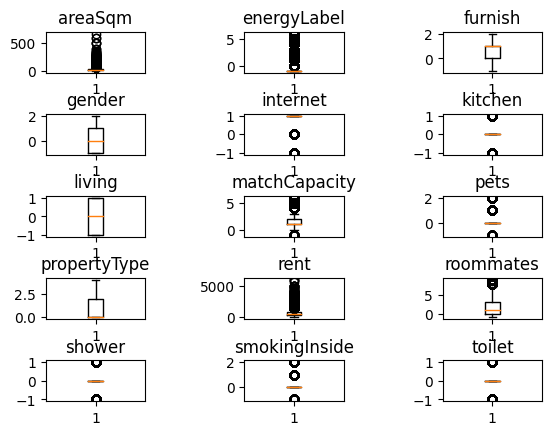

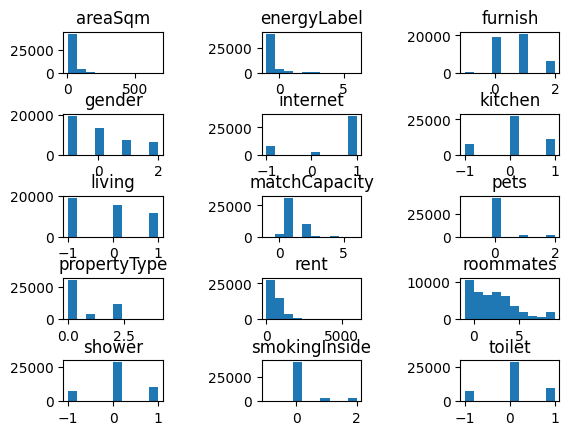

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# attributes_1 = ["areaSqm", "rent", "roommates"]
attributes = [# 'additionalCosts',
                'areaSqm',
                # 'city',
                # 'deposit',
                'energyLabel',
                'furnish',
                'gender',
                'internet',
                'kitchen',
                'living',
                'matchCapacity',
                # 'matchStatus',
                'pets',
                'propertyType',
                'rent',
                'roommates',
                'shower',
                'smokingInside',
                'toilet']

d = data[attributes].values
# print(d)
x = 5
y = 3
h_space = 1
w_space = 1

# plt.figure()

# plt.figure()
fig, axes = plt.subplots(x, y)
# print(axes.shape)
fig.subplots_adjust(hspace=h_space, wspace=w_space)
for n in range(x * y):
#     print(n)
#     print(n // y, n % y)
    axes[n // y, n % y].boxplot(d[:, n])
    axes[n // y, n % y].set(title=attributes[n])
plt.show()

# plt.figure()
fig, axes = plt.subplots(x, y)
fig.subplots_adjust(hspace=h_space, wspace=w_space)
for n in range(x * y):
    axes[n // y, n % y].hist(d[:, n])
    axes[n // y, n % y].set(title=attributes[n])
plt.show()

In [ ]:
amsterdam = read_geojson()
amsterdam.plot(column='Opp_m2', cmap='plasma')
plt.show()

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

data = gpd.GeoDataFrame(data, crs={ 'init': 'epsg:4326' }, geometry=[Point(coord) for coord in zip(data['longitude'], data['latitude'])])

In [ ]:
coastline = read_coastline()
coastline.to_crs(epsg=3857).plot(color='lightgrey', edgecolor='grey')
plt.show()

In [ ]:
for i, row in coastline.to_crs(epsg=3857).iterrows():
    geometry = row['geometry']

    data_within_region = data[data.to_crs(epsg=3857).within(geometry)]

    coastline.loc[i, 'advertisements'] = len(data_within_region)
    coastline.loc[i, 'mean_rent'] = data_within_region['rent'].mean()
    coastline.loc[i, 'median_rent'] = data_within_region['rent'].median()
    coastline.loc[i, 'mean_rent_per_sqm'] = (data_within_region['rent'] / data_within_region['areaSqm']).mean()
coastline = coastline.fillna(0)

In [ ]:
def plot_map(dataframe, column, title=None, cmap=None, figsize=(9, 7), colorbar_axes=None):
    if cmap is None:
        cmap = 'plasma'
    if colorbar_axes is None:
        colorbar_axes = [.81, .15, .04, .7]

    f, ax = plt.subplots()
    plot = dataframe.to_crs(epsg=3857).plot(ax=ax, column=column, edgecolor='grey', cmap=cmap)
    if title is not None:
        ax.set_title(title)

    cax = f.add_axes([.81, .15, .04, .7])
    scalar_mappable = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=coastline['advertisements'].min(),
                                                                          vmax=coastline['advertisements'].max()))
    f.colorbar(scalar_mappable, cax=cax)

plot_map(coastline, 'advertisements', title='Number of advertisements')
plot_map(coastline, 'mean_rent_per_sqm', title=r'Mean rent per $\mathrm{m}^2$')